# <font color='blue'>Projeto de Business Analytics - Possibilidade de Defeito em Garrafas de Vidro</font>
## <font color='blue'>Base de dados de 480.000 registros</font>
### <font color='blue'>Objetivo:</font>
#### <font color='blue'>Criar um modelo de Machine Learning que prevê a possibilidade da ocorrência de 'Parede Fina' Mínimo de 1,10mm</font>
#### <font color='blue'>Variáveis disponíveis para estudo: espessura da parede, temperatura da gota, temperatura da forma, pressão de trabalho, temperatura da archa de recozimento, produto aprovado e número da secção</font>
#### <font color='blue'>O modelo proposto indicará quais variáveis influenciarão e provocarão os defeitos

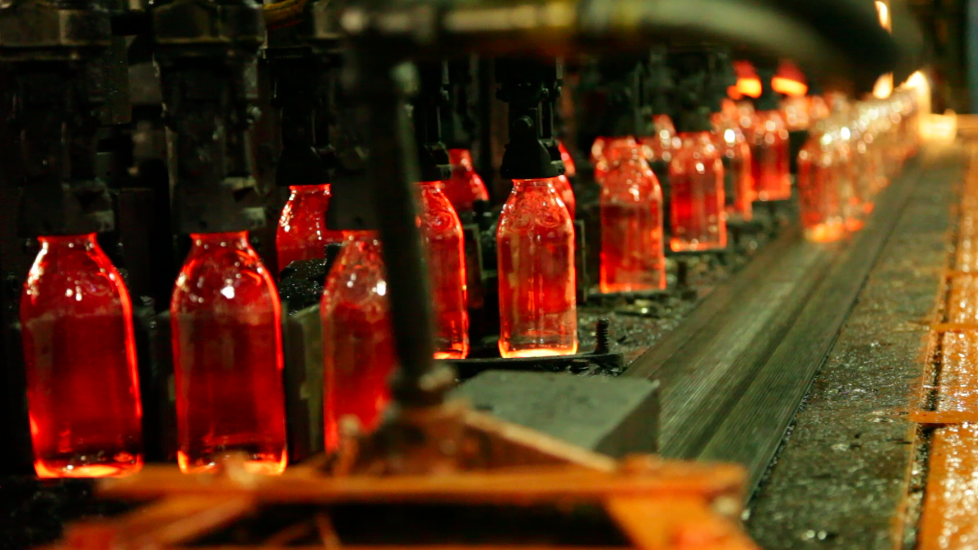

In [1]:
from IPython.display import Image
Image('dados/garrafa.png')

In [2]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Machine learning 
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions


# importar os módulos de sistema
import math
import sys, os


# Modulos especiais para tratamento de dados
sys.path.append(os.path.abspath(os.path.join('00')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

Author: Data Science Academy

numpy      : 1.23.5
plotly     : 5.9.0
sklearn    : 1.1.0
statsmodels: 0.14.0
pandas     : 1.5.3
matplotlib : 3.7.1
seaborn    : 0.12.2
scipy      : 1.10.0
sys        : 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]



### Análise Exploratória

In [3]:
# importar Dataset
df = pd.read_csv('dados/dataset1.csv')

In [4]:
df.shape

(480000, 7)

In [5]:
# visualizar de amostra dos dados
df.sample(10)

,espessura,temp_gota,temp_forma,pressao,temp_archa,aprovado,molde
268087,1.156627,824.080458,314.495088,104.919130,202.434755,1,9
3190,1.153038,823.441704,315.918112,101.804185,208.592856,1,1
404783,1.084974,817.607580,311.442817,104.518513,204.939773,0,14
3148,1.193321,823.013631,311.311787,103.716997,220.750027,1,1
425396,1.142388,816.998780,313.246976,104.589176,209.028393,1,15
298331,1.201077,820.904695,313.940884,105.804137,209.361569,1,10
422533,1.185445,832.087218,309.033109,101.034898,210.588742,1,15
62607,1.097697,815.300956,312.641208,102.014005,206.563657,0,3
15713,1.159036,828.492774,314.988947,101.837685,207.377690,1,1
452976,1.120610,816.204326,311.883297,104.060262,199.566649,1,16


In [6]:
# tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480000 entries, 0 to 479999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   espessura   480000 non-null  float64
 1   temp_gota   480000 non-null  float64
 2   temp_forma  480000 non-null  float64
 3   pressao     480000 non-null  float64
 4   temp_archa  480000 non-null  float64
 5   aprovado    480000 non-null  int64  
 6   molde       480000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 25.6 MB


In [7]:
# Correlação variáveis numéricas
df.corr('spearman')

,espessura,temp_gota,temp_forma,pressao,temp_archa,aprovado,molde
espessura,1.000000,0.592890,0.411149,0.305083,0.335960,0.448734,-0.001137
temp_gota,0.592890,1.000000,-0.003571,-0.000140,0.000577,0.304476,0.001110
temp_forma,0.411149,-0.003571,1.000000,-0.003599,0.001712,0.218313,0.000298
pressao,0.305083,-0.000140,-0.003599,1.000000,-0.000976,0.164514,-0.003461
temp_archa,0.335960,0.000577,0.001712,-0.000976,1.000000,0.178839,-0.002820
aprovado,0.448734,0.304476,0.218313,0.164514,0.178839,1.000000,-0.001065
molde,-0.001137,0.001110,0.000298,-0.003461,-0.002820,-0.001065,1.000000


In [8]:
X = df.iloc[:,1:5]
y = df.iloc[:,5].values

In [9]:
X

,temp_gota,temp_forma,pressao,temp_archa
0,824.263319,311.212995,101.065363,206.849216
1,815.280897,310.837755,105.349291,212.221175
2,825.975440,312.482098,108.453269,213.905909
3,828.836946,312.256146,106.292034,214.632587
4,824.720465,313.028271,107.403106,199.727372
...,...,...,...,...
479995,825.825948,313.244596,103.626436,214.640065
479996,822.208986,310.893248,106.317441,215.400253
479997,822.028969,303.973409,105.367753,209.271299
479998,819.981663,316.285706,100.534182,211.772896


In [10]:
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [11]:
# Formato de X e Y
print(X.shape, y.shape)

(480000, 4) (480000,)


### Classificação KNN em Python - Pré-Processamento e Normalização

In [12]:
# Divisão em dados de treino e de teste
Xi_treino, X_teste, yi_treino, y_teste = train_test_split(X, y, 
                                                          test_size = 0.30, 
                                                          random_state = 101)

In [13]:
# Divisão dos dados de treino em dados de treino e dados de validação
X_treino, X_valid, y_treino, y_valid = train_test_split(Xi_treino, 
                                                        yi_treino, 
                                                        test_size = 0.1, 
                                                        random_state = 84)

In [14]:
# Imprimindo o número de exemplos (observações) em cada dataset
print("Exemplos de Treino: {}".format(len(X_treino)))
print("Exemplos de Validação: {}".format(len(X_valid)))
print("Exemplos de Teste: {}".format(len(X_teste)))

Exemplos de Treino: 302400
Exemplos de Validação: 33600
Exemplos de Teste: 144000


In [15]:
# Normalização dos dados pela Média

# Cálculo da média do dataset de treino
X_norm = np.mean(X, axis = 0)

# Normalização dos dados de treino e de teste
X_treino_norm = X_treino - X_norm
X_valid_norm = X_valid - X_norm
X_teste_norm = X_teste - X_norm

In [16]:
# Shape dos datasets
print(X_treino_norm.shape, X_valid_norm.shape, X_teste_norm.shape)

(302400, 4) (33600, 4) (144000, 4)


### Classificação KNN em Python - Testando o Melhor Valor de K

In [17]:
# Range de valores de k que iremos testar
kVals = range(1, 40, 2)

In [18]:
# Lista vazia para receber as acurácias
acuracias = []

In [19]:
# Loop em todos os valores de k para testar cada um deles
for k in kVals:
    
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(X_treino_norm, y_treino)
          
    # Avaliando o modelo e atualizando a lista de acurácias
    score = modeloKNN.score(X_valid_norm, y_valid)
    print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
    acuracias.append(score)

Com valor de k = 1, a acurácia é = 92.98%
Com valor de k = 3, a acurácia é = 94.21%
Com valor de k = 5, a acurácia é = 94.66%
Com valor de k = 7, a acurácia é = 94.76%
Com valor de k = 9, a acurácia é = 94.89%
Com valor de k = 11, a acurácia é = 94.98%
Com valor de k = 13, a acurácia é = 95.07%
Com valor de k = 15, a acurácia é = 95.07%
Com valor de k = 17, a acurácia é = 95.12%
Com valor de k = 19, a acurácia é = 95.15%
Com valor de k = 21, a acurácia é = 95.17%
Com valor de k = 23, a acurácia é = 95.12%
Com valor de k = 25, a acurácia é = 95.16%
Com valor de k = 27, a acurácia é = 95.15%
Com valor de k = 29, a acurácia é = 95.17%
Com valor de k = 31, a acurácia é = 95.16%
Com valor de k = 33, a acurácia é = 95.12%
Com valor de k = 35, a acurácia é = 95.13%
Com valor de k = 37, a acurácia é = 95.15%
Com valor de k = 39, a acurácia é = 95.15%


In [20]:
# Obtendo o valor de k que apresentou a maior acurácia
i = np.argmax(acuracias)
print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kVals[i], 
                                                                                             acuracias[i] * 100))

O valor de k = 21 alcançou a mais alta acurácia de 95.17% nos dados de validação!


### Classificação KNN em Python - Construção e Treinamento do Modelo KNN

In [21]:
# Criando a versão final do modelo com o maior valor de k
modeloFinal = KNeighborsClassifier(n_neighbors = kVals[i])

In [22]:
# Treinamento do modelo
modeloFinal.fit(X_treino_norm, y_treino)

KNeighborsClassifier(n_neighbors=21)

### Classificação KNN em Python - Previsões com Dados de Teste e Avaliação do Modelo

In [23]:
# Previsões com os dados de teste
predictions = modeloFinal.predict(X_teste_norm)

In [24]:
# Performande do modelo nos dados de teste
print("Avaliação do Modelo nos Dados de Teste")
print(classification_report(y_teste, predictions))

Avaliação do Modelo nos Dados de Teste
              precision    recall  f1-score   support

           0       0.74      0.47      0.57     10391
           1       0.96      0.99      0.97    133609

    accuracy                           0.95    144000
   macro avg       0.85      0.73      0.77    144000
weighted avg       0.94      0.95      0.94    144000



In [25]:
# Confusion Matrix do Modelo Final
print ("Confusion matrix")
print(confusion_matrix(y_teste, predictions))

Confusion matrix
[[  4876   5515]
 [  1750 131859]]


### Simulação

In [26]:
# dados para simulação temp_gota, temp_forma, pressao, temp_archa
dados_simulacao = [[810, 310, 110, 230],
                   [780, 310, 105, 222],
                   [790, 320, 120, 240],
                   [780, 330, 120, 240],
                   [810, 300, 90, 210]]
colunas = ['temp_gota', 'temp_forma', 'pressao', 'temp_archa']

simulacao = pd.DataFrame(dados_simulacao, columns=colunas)

In [27]:
# normalização
simulacao_norm = simulacao - X_norm

In [28]:
# Fazer a previsão com o modelo treinado
previsao = modeloFinal.predict(simulacao_norm)

In [29]:
# Transformar array previsao em DataFrame invertendo de linha para coluna
previsao_df = pd.DataFrame(previsao, columns=["aprovado"])

# Concatenar DataFrame simulacao com previsao_df
simulacao_com_previsao = pd.concat([simulacao, previsao_df], axis=1)

In [30]:
# 0 = reprovado e 1 = aprovado
simulacao_com_previsao

,temp_gota,temp_forma,pressao,temp_archa,aprovado
0,810,310,110,230,1
1,780,310,105,222,0
2,790,320,120,240,1
3,780,330,120,240,1
4,810,300,90,210,0


## FIM